In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np
from numpy import linalg 

from numpy.random import randint
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score, accuracy_score

%config IPCompleter.greedy=True

from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
data = pd.read_csv(r'C:\Audiobooks\ForDS\heart.xls')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = data.drop('target', axis=1)
y = data.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
clf_rf = RandomForestClassifier()

In [24]:
params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [10]:
search_clf = GridSearchCV(clf_rf, params, cv=5)


In [25]:
search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [26]:
search_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [27]:
best_clf = search_clf.best_estimator_
best_clf

RandomForestClassifier(max_depth=7, n_estimators=30)

In [29]:
feature_importances = best_clf.feature_importances_

In [30]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances' : feature_importances}) 

In [31]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
11,ca,0.160465
12,thal,0.127403
9,oldpeak,0.103539
8,exang,0.091913
7,thalach,0.089592
2,cp,0.084071
3,trestbps,0.082555
0,age,0.075749
4,chol,0.068263
10,slope,0.055403


# 1

#### Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

# 2

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])

imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [33]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [35]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

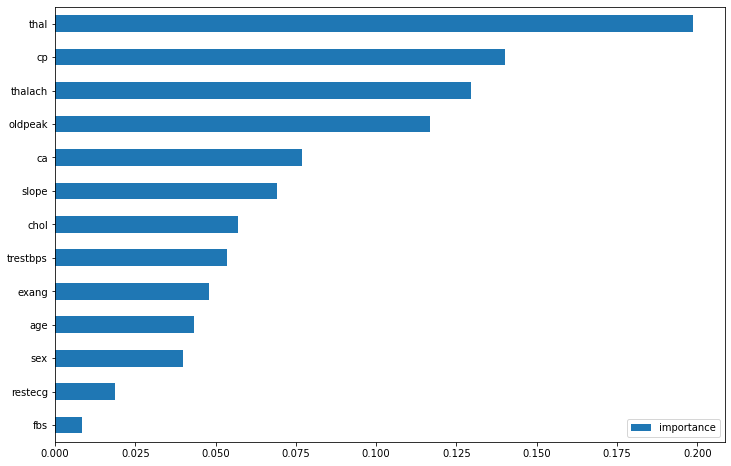

In [37]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# 3.5.1



Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)

Параметры для выбора -

    n_estimators: от 10 до 50 с шагом 10
    max_depth: от 1 до 12 с шагом 2
    min_samples_leaf: от 1 до 7
    min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?


In [43]:
training_mush = pd.read_csv(r'C:\Audiobooks\ForDS\training_mush.csv')
training_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [44]:
y = training_mush['class']
X = training_mush.drop('class', axis=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [51]:
params = {'n_estimators': range(10, 55, 10),
         'max_depth': range(1, 13, 2),
         'min_samples_leaf': range(1, 8),
         'min_samples_split': range(2, 10, 2)}

In [54]:
search_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [78]:
search_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 55, 10)})

In [79]:
search_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# 2

Найти важности фичей для нашего классификатора

In [63]:
best_clf = search_clf.best_estimator_

In [75]:
feature_importances = best_clf.feature_importances_

In [65]:
feature_importances

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

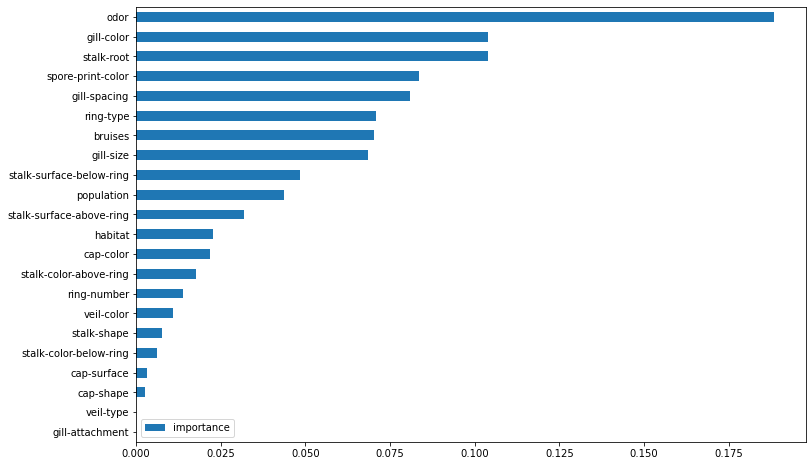

In [77]:
imp = pd.DataFrame(feature_importances, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [80]:
X_test = pd.read_csv(r'C:\Audiobooks\ForDS\testing_mush.csv')
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


# 3

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [119]:
y_pred = best_clf.predict(X_test)
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

# 4

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, 

In [117]:
y_test = pd.read_csv(r'C:\Audiobooks\ForDS\testing_y_mush.csv')['class']
y_test.head()

0    0
1    0
2    1
3    1
4    1
Name: class, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1055,    0],
       [   0,  976]], dtype=int64)

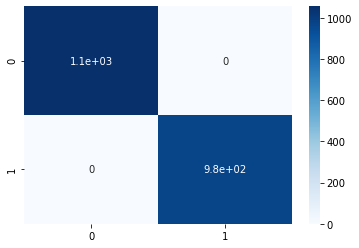

In [128]:
sns.heatmap(conf_matrix, annot=True, 
            cmap='Blues')

# 5



Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!


In [47]:
df = pd.read_csv(r'C:\Audiobooks\ForDS\invasion.csv')
df

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [130]:
X_train = df.drop('class', axis=1)
y_train = df['class']

In [133]:
clf = RandomForestClassifier()

In [134]:
params = {'n_estimators': range(10, 55, 10),
         'max_depth': range(1, 16, 2),
         'min_samples_leaf': range(1, 11),
         'min_samples_split': range(2, 10, 2)}

In [135]:
search_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [136]:
search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 55, 10)})

In [137]:
search_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [138]:
best_clf = search_clf.best_estimator_

In [139]:
X_test = pd.read_csv(r'C:\Audiobooks\ForDS\operative_information.csv')


In [141]:
y_pred = best_clf.predict(X_test)

In [145]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

# 6

Какая переменная оказалась самой важной для классифицирования кораблей?

In [146]:
feature_importances = best_clf.feature_importances_

In [147]:
feature_importances

array([0.16172073, 0.16706551, 0.02901643, 0.12363593, 0.        ,
       0.5185614 ])

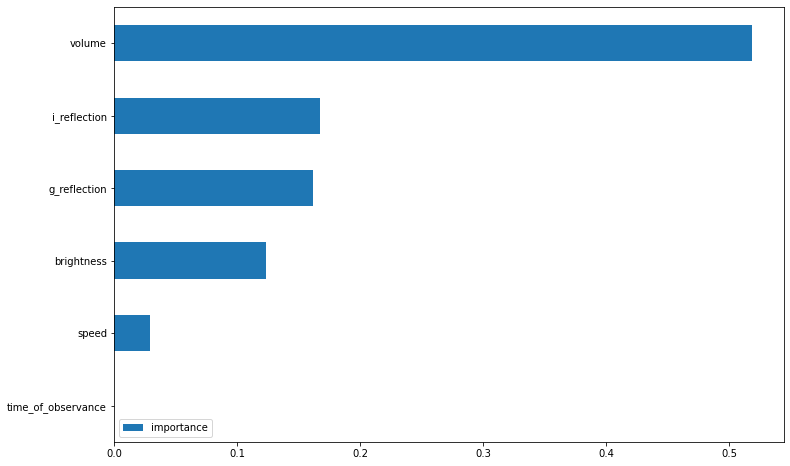

In [148]:
imp = pd.DataFrame(feature_importances, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# 7

теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [150]:
df = pd.read_csv(r'C:\Audiobooks\ForDS\space_can_be_a_dangerous_place.csv')
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [159]:
df.shape

(100000, 8)

In [154]:
X_train = df.drop('dangerous', axis=1)
y_train = df.dangerous

In [151]:
clf = RandomForestClassifier()

In [160]:
params = {'n_estimators': range(10, 40, 10),
         'max_depth': range(1, 10, 2),
         'min_samples_leaf': range(1, 8),
         'min_samples_split': range(2, 10, 2)}

In [165]:
search_clf = RandomizedSearchCV(clf, params, cv=3, n_jobs=-1)
# search_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [166]:
search_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 40, 10)})

In [167]:
search_clf.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 5}

In [168]:
best_clf = search_clf.best_estimator_

In [169]:
feature_importances = best_clf.feature_importances_

In [170]:
feature_importances

array([0.00214423, 0.00357901, 0.00250283, 0.00377667, 0.01613085,
       0.53438602, 0.4374804 ])

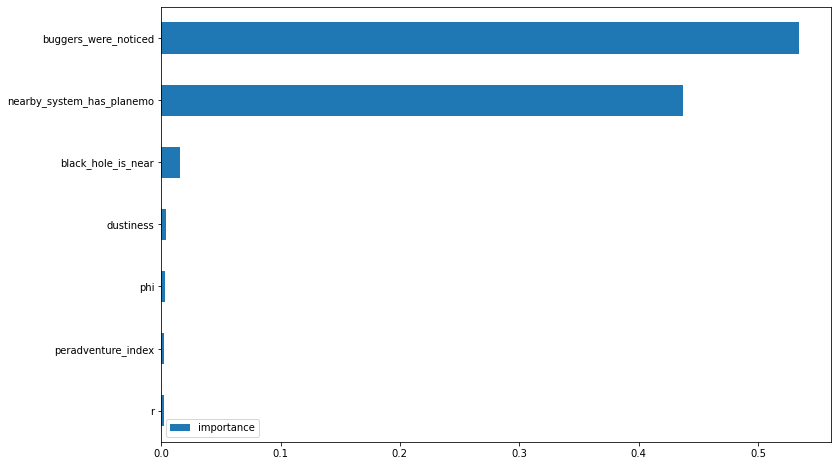

In [171]:
imp = pd.DataFrame(feature_importances, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# 8



Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

 

Пример датасэта для тестирования

При использовании jupyter notebook можно оттестировать скорость выполнения кода при помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение

%%timeit
your_command

Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time

from time import time
before = time()
your_command
after = time()
print(after - before)

 


In [172]:
df = pd.read_csv(r'C:\Audiobooks\ForDS\iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [173]:
%%timeit
df.mean(axis=0)

155 µs ± 6.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [175]:
%%timeit
df.apply('mean')

220 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [174]:
%%timeit
df.apply(np.mean)

1.03 ms ± 84.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [176]:
%%timeit
df.describe().loc['mean']

11.4 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Time Series Data

In [3]:
stock = pd.read_csv(r'C:\Audiobooks\ForDS\amzn_stock.csv', index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [4]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

## Получаем данные по дате / промежутку времени / частичной дате

In [23]:
stock['2016']

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,656.29,657.72,627.51,636.99,9280761
2016-01-05,646.86,646.91,627.65,633.79,5822603
2016-01-06,622.00,639.79,620.31,632.65,5329197
2016-01-07,621.80,630.00,605.21,607.94,7074915
2016-01-08,619.66,624.14,606.00,607.05,5512915
...,...,...,...,...,...
2016-12-23,764.55,766.50,757.99,760.59,1981616
2016-12-27,763.40,774.65,761.20,771.40,2638725
2016-12-28,776.25,780.00,770.50,772.13,3301025


In [8]:
stock['2012-05-20': '2012-10-21']

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-21,214.03,219.98,212.82,218.11,3580096
2012-05-22,218.31,218.87,213.96,215.33,3733844
2012-05-23,214.71,217.55,211.18,217.28,4243774
2012-05-24,216.98,217.66,212.70,215.24,3141496
2012-05-25,214.99,215.98,212.22,212.89,2171364
...,...,...,...,...,...
2012-10-15,242.85,244.78,238.51,244.18,2960049
2012-10-16,244.87,245.77,242.08,243.94,2204143
2012-10-17,243.37,248.80,243.30,247.49,3303018


## Оконные функции

In [22]:
stock.resample('1w').mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60


In [21]:
stock.expanding().sum().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543.0
2010-01-05,269.68,272.09,264.95,268.59,16456999.0
2010-01-06,404.28,406.82,396.60,400.84,23637976.0
2010-01-07,536.29,539.14,525.40,530.84,34668100.0
2010-01-08,666.85,672.82,654.43,664.36,44501929.0


In [20]:
stock.ewm(alpha=0.4).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.487500,135.903750,132.308750,134.393750,8.385489e+06
2010-01-06,134.544898,135.304898,131.972653,133.300000,7.770942e+06
2010-01-07,133.379963,133.933162,130.514632,131.783456,9.268728e+06
2010-01-08,132.156870,133.823359,129.870708,132.536641,9.513827e+06


## Оконные функции для сглаживания кривых

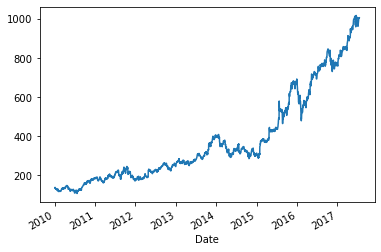

In [24]:
stock['Open'].plot()

In [34]:
ns = stock['Open'].rolling(14, min_periods=1).mean()

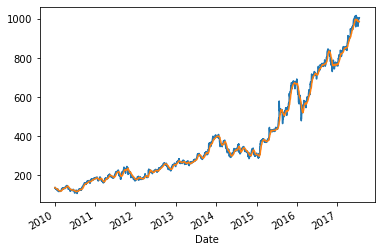

In [35]:
stock['Open'].plot()
ns.plot()

In [39]:
stock.index.month_name().value_counts()

March        176
June         172
May          169
April        164
January      160
July         158
August       155
February     154
October      152
December     149
September    144
November     143
Name: Date, dtype: int64

# 9

К вам попали наблюдения о числе перелетающих на зимовку стрижей, представленные в виде пандасовской серии wintering. В каждой ячейке указано число пролетевших птиц за этот день. Посчитайте с помощью expanding окна количество всех перелетевших птиц за всё время до данного и поместите в переменную total_birds.

In [ ]:
total_birds = wintering.expanding().sum()